<a href="https://colab.research.google.com/github/Beta628427/Tesis/blob/master/Beta_PCA/KPCA_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install mglearn

In [5]:
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


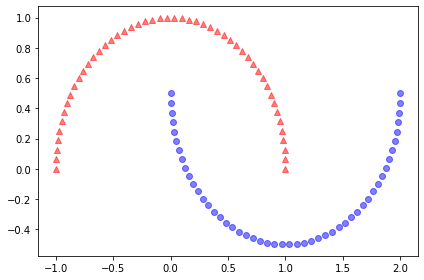

In [6]:
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
Y = y[:, np.newaxis]

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

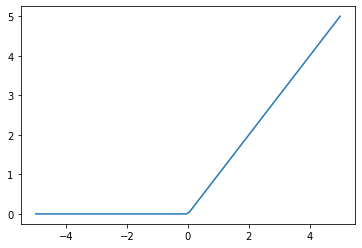

In [7]:
# ==============================================================================
# RED NEURONAL <<<<< NO MODIFICAR >>>>>
# ==============================================================================
# Clase de capa de red

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

# ==============================================================================
# Funciones de activación

# Sigmoido
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))
# Relu
relu = lambda x: np.maximum(0, x)
_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))

# ==============================================================================
# creamos red neurnal

def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn

# ==============================================================================
topology = [2, 8, 1]
neural_net = create_nn(topology, sigm)  
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  out = [(None, X)]
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z, a))
  if train:
    # Backward pass
    deltas = []
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      if l == len(neural_net) - 1:
        # calculamos delta de ultima capa
        # formula de delta0
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        # calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      _W = neural_net[l].W
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, 
                                                  keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  return out[-1][1]
train(neural_net, X, Y, l2_cost, 0.5)
print("")

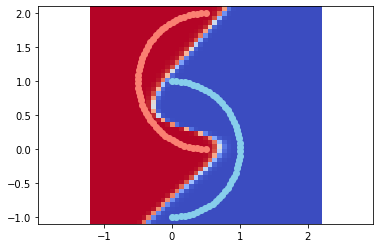

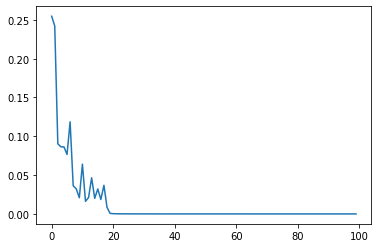

In [14]:
topology = [2,8,16,8,4,1]
neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.5)
  if i % 25 == 0:
    # print(pY)
    loss.append(l2_cost[0](pY, Y))
    res = 50
    _x1 = np.linspace(-1.1, 2.1, res)
    _x0 = np.linspace(-1.2, 2.2, res)
    _Y = np.zeros((res, res))
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")
    plt.scatter(X[Y[:, 0] == 0, 1], X[Y[:, 0] == 0, 0], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 1], X[Y[:, 0] == 1, 0], c="salmon")
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5) 
    print("")

In [0]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()